In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/data.csv", encoding='latin')
df.shape

(541909, 8)

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.Quantity.value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

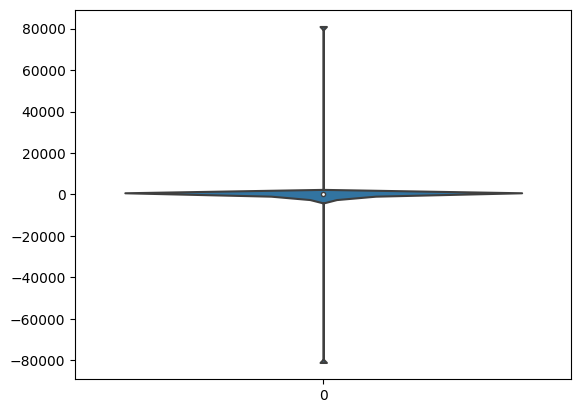

In [ ]:
sns.violinplot(df.Quantity);

In [ ]:
df = df[df.Quantity >= 0]

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
df.CustomerID.isna().sum()

133361

In [ ]:
df.shape

(531285, 8)

In [ ]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

In [ ]:
df.shape

(397924, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [ ]:
#RECENCY
df.InvoiceDate.max()

'9/9/2011 9:52'

In [ ]:
df['date'] = pd.to_datetime(df['InvoiceDate'])
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country                date  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00

In [ ]:
df.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
a = df.date.max() - df.date.min()
a

Timedelta('373 days 04:24:00')

In [ ]:
a.days

373

In [ ]:
#Taking recent purchase date as a parameter to decide the recency of the customer
recent_purchase_date = df.date.max()
recent_purchase_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
#grouping customers by customerID as same customer may have visited the store more than once so while comparing we will only consider his/her last visit as a recent visit
recency_df = df.groupby(
    ['CustomerID'],
    as_index=False,
)['date'].max()

recency_df.columns = ['CustomerID', 'RecencyDate']

In [ ]:
recency_df.head()

CustomerID         RecencyDate
0     12346.0 2011-01-18 10:01:00
1     12347.0 2011-12-07 15:52:00
2     12348.0 2011-09-25 13:13:00
3     12349.0 2011-11-21 09:51:00
4     12350.0 2011-02-02 16:01:00

In [ ]:
#finding out the number of days gap
recency_df['recency'] = recency_df['RecencyDate'].apply(
    lambda x: (recent_purchase_date - x).days
)

recency_df.head()

CustomerID         RecencyDate  recency
0     12346.0 2011-01-18 10:01:00      325
1     12347.0 2011-12-07 15:52:00        1
2     12348.0 2011-09-25 13:13:00       74
3     12349.0 2011-11-21 09:51:00       18
4     12350.0 2011-02-02 16:01:00      309

In [ ]:
recency_df.drop(
    columns=['RecencyDate'],
    inplace=True
)

In [ ]:
recency_df.head()

CustomerID  recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309

In [ ]:
recency_df.shape

(4339, 2)

In [ ]:
#Frequency
#how frequently the customer has visited the store
freq_df = df.copy()
freq_df.drop_duplicates(
    subset=['CustomerID', 'InvoiceNo'],
    keep='first',
    inplace=True
)
freq_df.shape

(18536, 9)

In [ ]:
freq_df = freq_df.groupby(
    'CustomerID',
    as_index=False
)['InvoiceNo'].count()
freq_df.columns = ['CustomerID', 'Frequency']
freq_df.head()

CustomerID  Frequency
0     12346.0          1
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1

In [ ]:
freq_df[freq_df.CustomerID == 12748.0]

CustomerID  Frequency
326     12748.0        210

In [ ]:
freq_df.shape

(4339, 2)

In [ ]:
#Monetary
#how much money that he had spent in the store
df['Total'] = df['UnitPrice'] * df['Quantity']
df.shape

(397924, 10)

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country                date  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   

   Total  
0  15.30  
1  20.34  
2  22.00  
3  20.34  
4  20.34

In [ ]:
monetary_df = df.groupby(
    ['CustomerID'],
    as_index=False
)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

CustomerID  Monetary
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40

In [ ]:
monetary_df.shape

(4339, 2)

In [ ]:
#Combining RFM together
rf = recency_df.merge(
    freq_df,
    left_on="CustomerID",
    right_on='CustomerID'
)
rf.shape

(4339, 3)

In [ ]:
rf.head()

CustomerID  recency  Frequency
0     12346.0      325          1
1     12347.0        1          7
2     12348.0       74          4
3     12349.0       18          1
4     12350.0      309          1

In [ ]:
rfm = rf.merge(
    monetary_df,
    left_on='CustomerID',
    right_on='CustomerID'
)
rfm.shape

(4339, 4)

In [ ]:
rfm.head()

CustomerID  recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 169.5 KB


In [ ]:
rfm.describe()

CustomerID      recency    Frequency       Monetary
count   4339.000000  4339.000000  4339.000000    4339.000000
mean   15299.936852    91.518322     4.271952    2053.793018
std     1721.889758   100.009747     7.705493    8988.248381
min    12346.000000     0.000000     1.000000       0.000000
25%    13812.500000    17.000000     1.000000     307.245000
50%    15299.000000    50.000000     2.000000     674.450000
75%    16778.500000   141.000000     5.000000    1661.640000
max    18287.000000   373.000000   210.000000  280206.020000

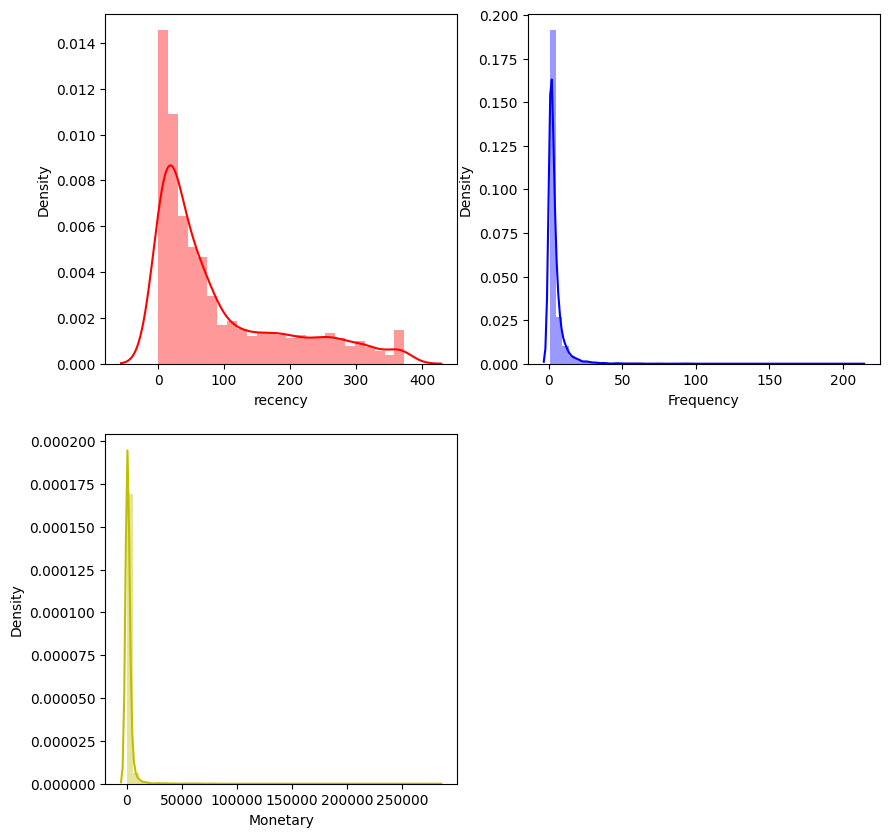

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.distplot(rfm['recency'], color='r')
plt.subplot(2, 2, 2)
sns.distplot(rfm['Frequency'], color='b')
plt.subplot(2, 2, 3)
sns.distplot(rfm['Monetary'], color='y')
plt.show()

In [ ]:
rfm.recency.describe()

count    4339.000000
mean       91.518322
std       100.009747
min         0.000000
25%        17.000000
50%        50.000000
75%       141.000000
max       373.000000
Name: recency, dtype: float64

In [ ]:
fig = px.box(rfm, y = 'Frequency')

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Frequency</b>',
)
fig.show()

In [ ]:
fig = px.box(rfm, y = 'Monetary')

fig.update_layout(
    autosize=True,
    width=750,
    height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Monetary</b>',
)
fig.show()

In [ ]:
quantiles = rfm.quantile([0.25, 0.5, 0.75, 1])
quantiles.drop(
    ['CustomerID'],
    axis=1,
    inplace=True
)
quantiles.head()

recency  Frequency    Monetary
0.25     17.0        1.0     307.245
0.50     50.0        2.0     674.450
0.75    141.0        5.0    1661.640
1.00    373.0      210.0  280206.020

In [ ]:
quantiles.recency[0.50]

50.0

In [ ]:
def label_customers(value, feature, quantile_df):
    if feature == 'recency':
        if value <= quantile_df[feature][0.25]:
            return 4
        if value <= quantile_df[feature][0.5]:
            return 3
        if value <= quantile_df[feature][0.75]:
            return 2
        else:
            return 1
    else:
        if value <= quantile_df[feature][0.25]:
            return 1
        if value <= quantile_df[feature][0.5]:
            return 2
        if value <= quantile_df[feature][0.75]:
            return 3
        else:
            return 4

In [ ]:
rfm['r_quantile'] = rfm.recency.apply(
    label_customers,
    args=('recency', quantiles)
)
rfm.head()

CustomerID  recency  Frequency  Monetary  r_quantile
0     12346.0      325          1  77183.60           1
1     12347.0        1          7   4310.00           4
2     12348.0       74          4   1797.24           2
3     12349.0       18          1   1757.55           3
4     12350.0      309          1    334.40           1

In [ ]:
rfm['f_quantile'] = rfm.Frequency.apply(
    label_customers,
    args=('Frequency', quantiles)
)
rfm.head()

CustomerID  recency  Frequency  Monetary  r_quantile  f_quantile
0     12346.0      325          1  77183.60           1           1
1     12347.0        1          7   4310.00           4           4
2     12348.0       74          4   1797.24           2           3
3     12349.0       18          1   1757.55           3           1
4     12350.0      309          1    334.40           1           1

In [ ]:
rfm['m_quantile'] = rfm.Monetary.apply(
    label_customers,
    args=('Monetary', quantiles)
)
rfm.head()

CustomerID  recency  Frequency  Monetary  r_quantile  f_quantile  \
0     12346.0      325          1  77183.60           1           1   
1     12347.0        1          7   4310.00           4           4   
2     12348.0       74          4   1797.24           2           3   
3     12349.0       18          1   1757.55           3           1   
4     12350.0      309          1    334.40           1           1   

   m_quantile  
0           4  
1           4  
2           4  
3           4  
4           2

In [ ]:
rfm['rfm_quantile'] = rfm['r_quantile'].astype(str) +  rfm['f_quantile'].astype(str) + rfm['m_quantile'].astype(str)
rfm.head()

CustomerID  recency  Frequency  Monetary  r_quantile  f_quantile  \
0     12346.0      325          1  77183.60           1           1   
1     12347.0        1          7   4310.00           4           4   
2     12348.0       74          4   1797.24           2           3   
3     12349.0       18          1   1757.55           3           1   
4     12350.0      309          1    334.40           1           1   

   m_quantile rfm_quantile  
0           4          114  
1           4          444  
2           4          234  
3           4          314  
4           2          112

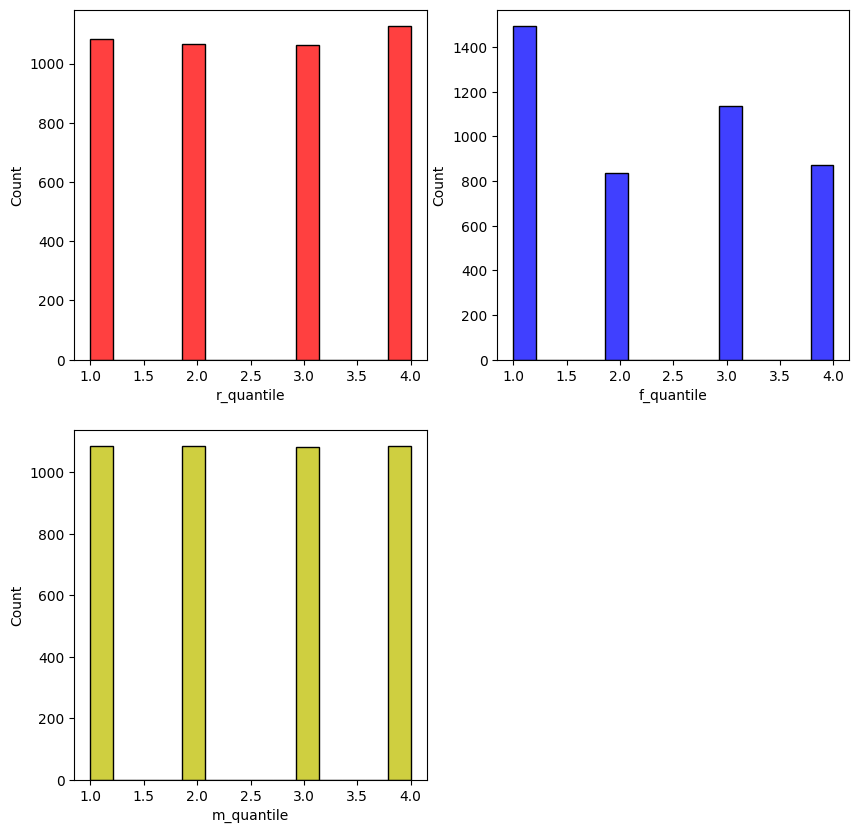

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(rfm['r_quantile'], color='r')
plt.subplot(2, 2, 2)
sns.histplot(rfm['f_quantile'], color='b')
plt.subplot(2, 2, 3)
sns.histplot(rfm['m_quantile'], color='y')
plt.show()

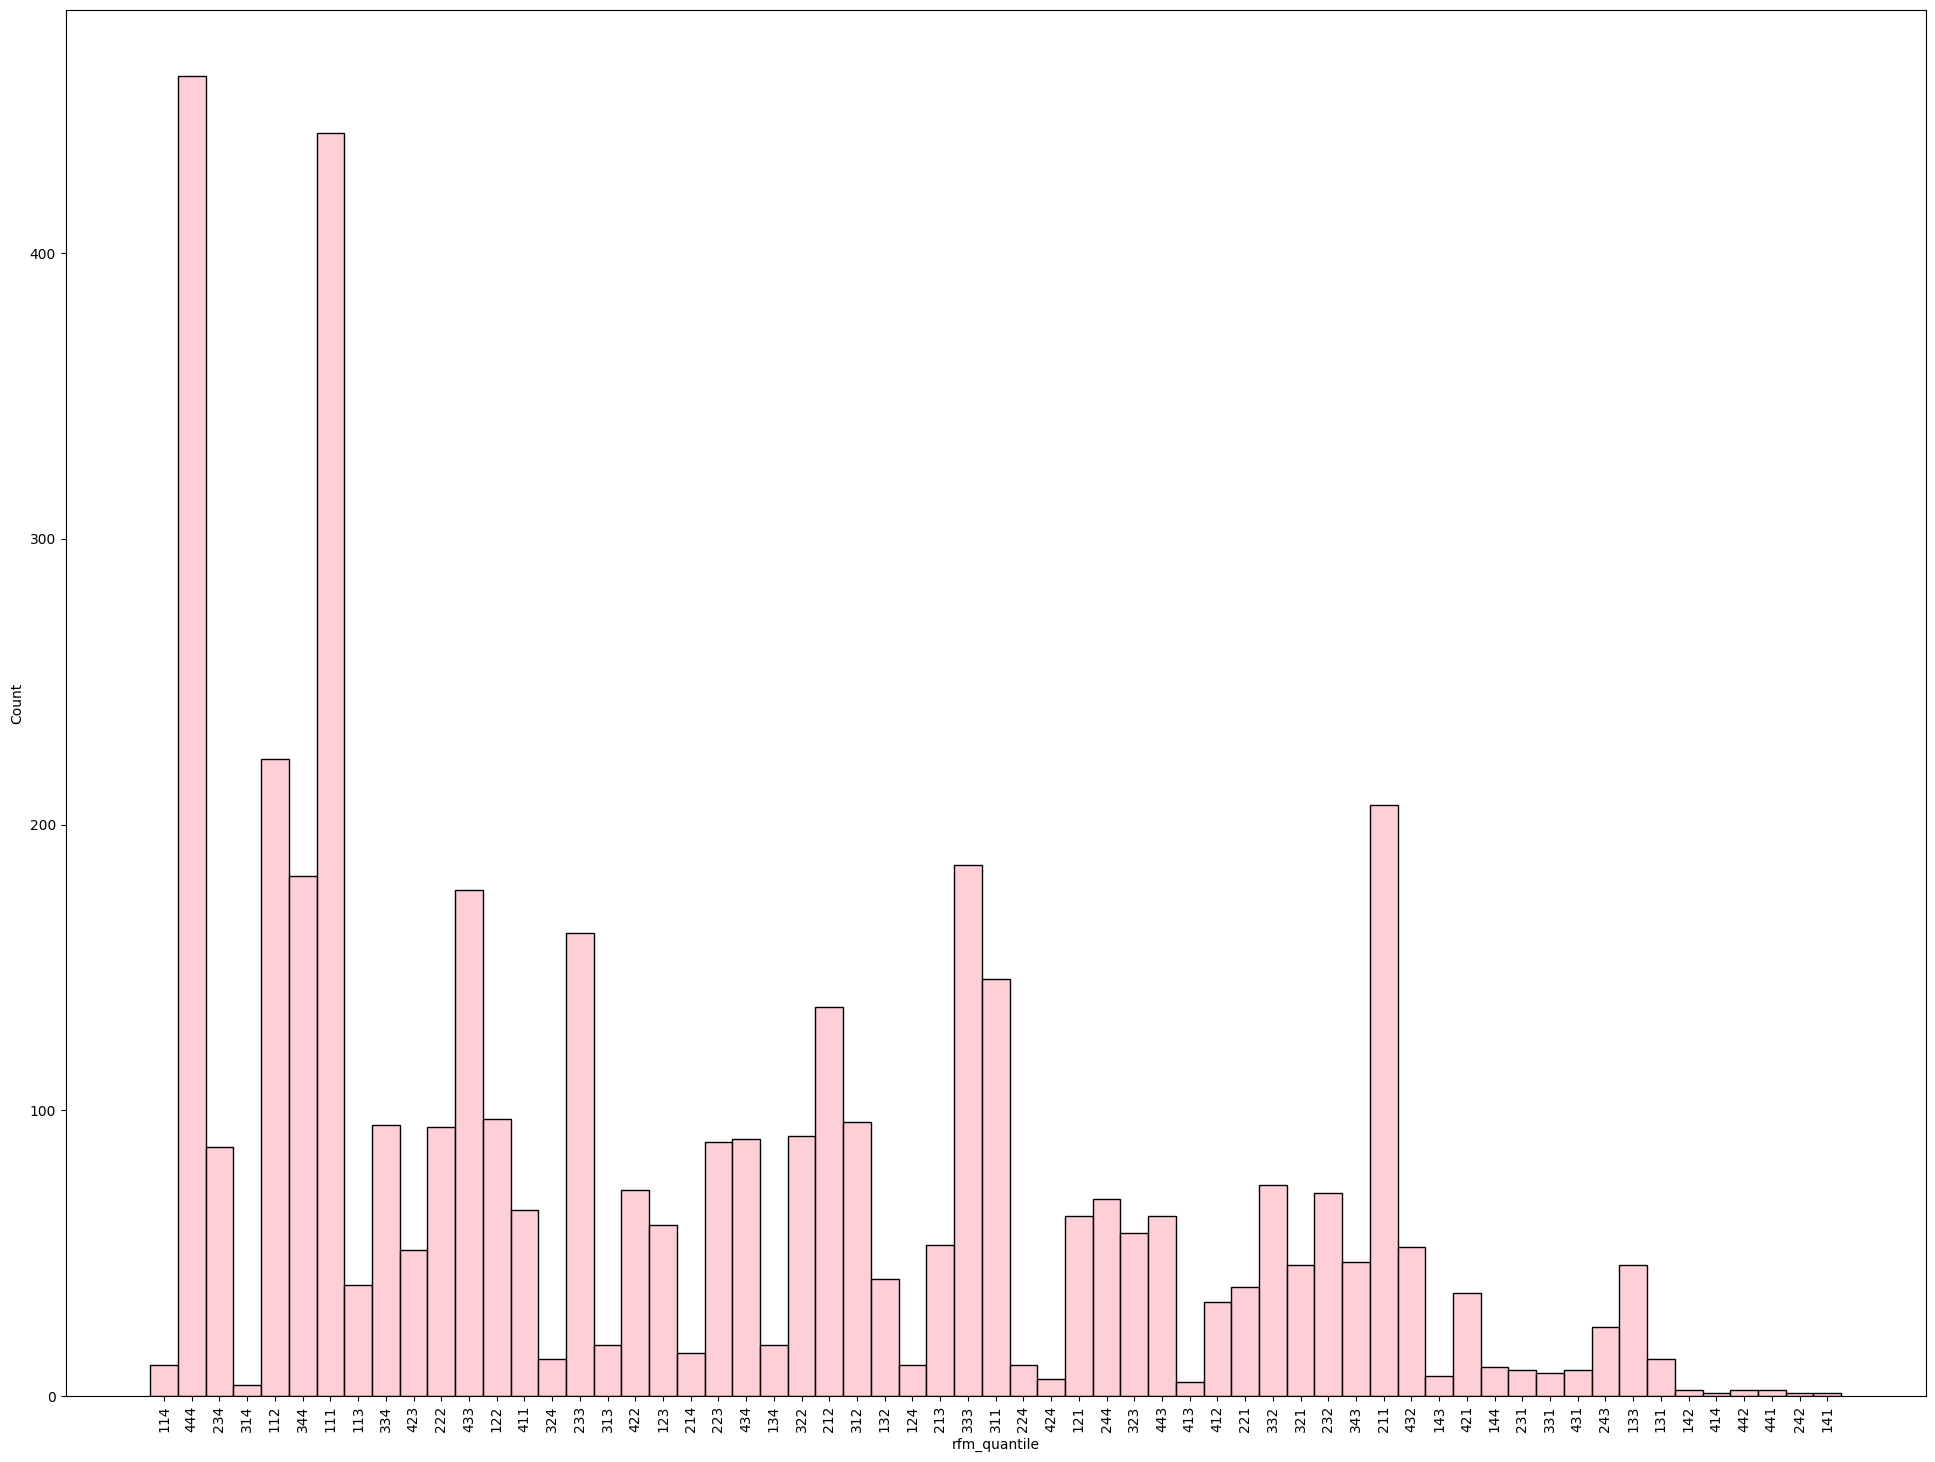

In [ ]:
plt.figure(figsize=(24, 18))
sns.histplot(rfm['rfm_quantile'], color='pink')
plt.xticks(rotation=90);

In [ ]:
def customer_segments(value):
    if value == '444':
        return "Best Customer"
    if value[1] == '4':
        return "Loyal Customer"
    if value[2] == '4':
        return "Big Spender"
    if value == "111":
        return "DeadBeats"
    if value[0] == '1' and value[2] == '1' and value[1] != '1':
        return "Lost Customer"


In [ ]:
rfm['Segmentation'] = rfm.rfm_quantile.apply(
    customer_segments,
)
rfm.head()

CustomerID  recency  Frequency  Monetary  r_quantile  f_quantile  \
0     12346.0      325          1  77183.60           1           1   
1     12347.0        1          7   4310.00           4           4   
2     12348.0       74          4   1797.24           2           3   
3     12349.0       18          1   1757.55           3           1   
4     12350.0      309          1    334.40           1           1   

   m_quantile rfm_quantile   Segmentation  
0           4          114    Big Spender  
1           4          444  Best Customer  
2           4          234    Big Spender  
3           4          314    Big Spender  
4           2          112           None

In [ ]:
rfm.Segmentation.value_counts()

Best Customer     462
DeadBeats         442
Loyal Customer    410
Big Spender       362
Lost Customer      76
Name: Segmentation, dtype: int64

In [ ]:
labels = list((rfm['Segmentation'].value_counts()).index)
values = rfm['Segmentation'].value_counts()
# Create subplots: use 'domain' type for Pie subplot
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
title = f"<b>Customer Segmentation</b>"

fig.update_layout(
    title=dict(text=title, x=0.5, xanchor='center'),
    showlegend=True,
)
fig.update_traces(hole=.2, hoverinfo="all", textfont_size=16)
fig.show()
